In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_settings= {
    "x_min": -20.0,
    "x_max": 20.0,
    "y_min": -10.0,
    "y_max": 12.0,
    "aspect": 'equal',
    "x_ticks_step": 2,
    "y_ticks_step": 2,
    "grid_minor_alpha": 0.1,
    "grid_major_alpha": 0.5,
}

In [3]:
def new_plot(settings):
    fig, ax = plt.subplots(figsize=((settings["x_max"]-settings["x_min"])/4,(settings["y_max"]-settings["y_min"])/4))

    #Achsen Verhältings
    ax.set_aspect(settings["aspect"])

    #Achsen Skala
    ax.axis([settings["x_min"],settings["x_max"],settings["y_min"],settings["y_max"]])

    #Achsen Beschriftung
    ax.set_xticks(np.arange(settings["x_min"],settings["x_max"]+1,settings["x_ticks_step"]))
    ax.set_yticks(np.arange(settings["y_min"],settings["y_max"]+1,settings["y_ticks_step"]))

    #Gitter 
    ax.set_xticks(np.arange(settings["x_min"],settings["x_max"]+1),minor=True)
    ax.set_yticks(np.arange(settings["y_min"],settings["y_max"]+1),minor=True)
    ax.grid(which='minor', alpha=settings["grid_minor_alpha"])
    ax.grid(which='major', alpha=settings["grid_major_alpha"])
    return fig, ax

In [4]:
def draw_plot(x,y,color,settings=None,subplot=(None,None)):

    if subplot == (None,None):
        fig, ax = new_plot(settings)
    else:
        fig, ax = subplot

    ax.plot(x, y, color)
    return fig, ax

(<Figure size 720x396 with 1 Axes>, <AxesSubplot:>)

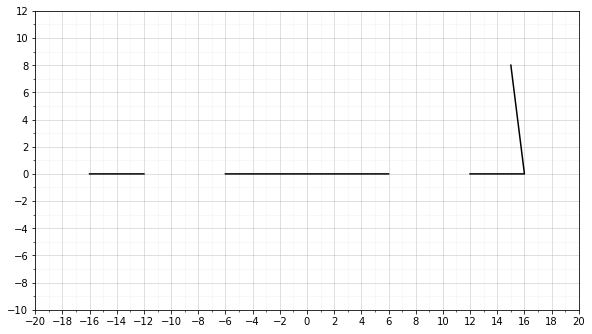

In [5]:
x_BH = [-16,-12,np.nan,-6,6,np.nan,12,16,15,np.nan]
y_BH = [0,0,np.nan,0,0,np.nan,0,0,8,np.nan]

draw_plot(x_BH, y_BH, 'k', plot_settings)

In [6]:
def circle(radius, offset, resolution):
    x_offset, y_offset = offset
    t = np.linspace(0, 2*np.pi, resolution)   

    x = x_offset + radius * np.cos(t)
    y = y_offset + radius * np.sin(t)

    x = np.append(x, np.nan)
    y = np.append(y, np.nan)
    return x,y

(<Figure size 720x396 with 1 Axes>, <AxesSubplot:>)

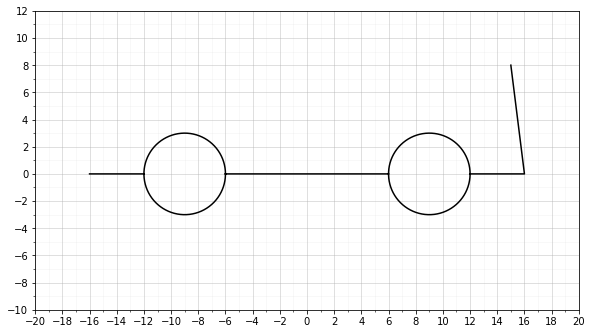

In [7]:
x_rad1,y_rad1 = circle(3, (-9, 0), 1000)

x_rad2,y_rad2 = circle(3, (9, 0), 1000)

x = np.concatenate((x_BH, x_rad1, x_rad2))
y = np.concatenate((y_BH,y_rad1, y_rad2))

draw_plot(x, y, 'k', plot_settings)

In [8]:
# Polynominterpolation mit Vandermonde-Matrix
def polynominterpolation_VmM(points):
    X = [] # Vandermonde-Matrix
    f = [] # Funktionswerte

    # Generiren der Vandermonde-Matrix und Funktionswerte aus übergeben Punkten
    for  x, y in points:
        X_row = [1, x] #X_row ist eine Zeile der Vandermonde-Matrix
        for i in range(2, len(points)):  #
            X_row.append(np.power(x, i)) # [1, x, ..., x^(n-1)], n: Anzahl der Punkte(len(points))

        X.append(X_row)
        f.append(y)

    a = np.linalg.solve(X,f) # Bestimen der Koeffizienten

    return a

    #https://en.wikibooks.org/wiki/Algorithm_Implementation/Mathematics/Polynomial_interpolation. Warscheinlich efficenter

In [9]:
#def trajectory(x, y, resolution):
def curve_through(points):

    # Polynominterpolation mit Vandermonde-Matrix
    a = polynominterpolation_VmM(points)# a: Koeffizienten des Polinom durch die Punkte

    #x = sorted(x)
    #x = np.linspace(x[0], x[-1], resolution)

    #Den kleinsten x- und grösten x-Wert nemen (es wird erwartet das die punkt entlang der x-Achse sortitrt sind)
    x_out = np.arange(points[0][0], points[-1][0]+1)# x_out Lister aller x zwischen kleinsten x- und grösten x-Wert mit der Schrittweite 1
    y_out = []

    # x in das Polynom einsetzen
    for x in x_out:
        y = a[0] + a[1]*x            # ----|
        for i in range(2,a.size):    #    \/
           y += a[i] * np.power(x, i)# a0 + a1*x + ... + an*x^n  , n: Anzal der Koeffizienten(a.size)
        
        y_out.append(y)

    x_out = np.append(x_out, np.nan)
    y_out = np.append(y_out, np.nan)
    return x_out, y_out

(<Figure size 720x396 with 1 Axes>, <AxesSubplot:>)

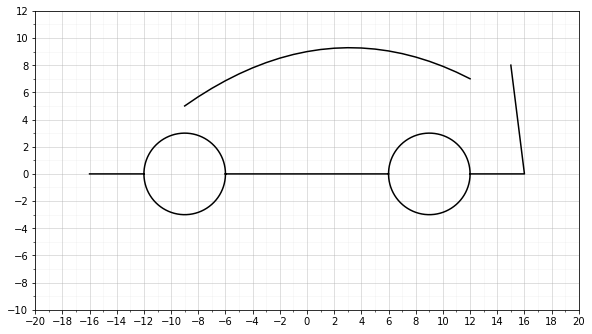

In [10]:
x_dach, y_dach = curve_through([(-9,5), (0,9), (12,7)])

x = np.concatenate((x, x_dach))
y = np.concatenate((y,y_dach))

draw_plot(x, y, 'k', plot_settings)

(<Figure size 720x396 with 1 Axes>, <AxesSubplot:>)

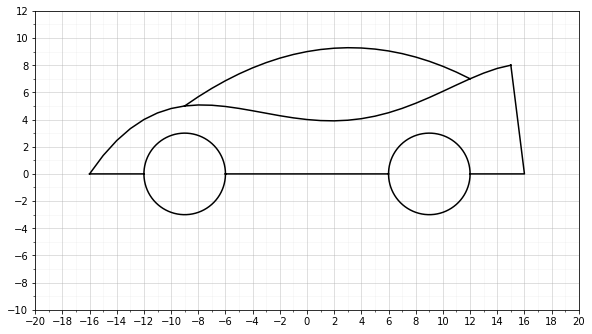

In [11]:
x_k, y_k = curve_through([(-16,0), (-12,4), (-9,5), (0,4), (12, 7), (15,8)])

x = np.concatenate((x, x_k))
y = np.concatenate((y,y_k))

draw_plot(x, y, 'k', plot_settings)

In [12]:
def rotate(x, y, degree, offset=(0,0) ):
    x_offset, y_offset = offset
    
    rad = degree*(np.pi/180)# np.cos und np.sin benötigen Rad statt Grad
    
    #Gegenuhrzeigersinn
    #x_out = x*np.cos(rad) - y*np.sin(rad)
    #y_out = x*np.sin(rad) + y*np.cos(rad)

    #Uhrzeigersinn
    #x_out =   x*np.cos(rad) + y*np.sin(rad)
    #y_out = - x*np.sin(rad) + y*np.cos(rad)

    ##Zum offset verschiben
    #x_displace = x - x_offset
    #y_displace = y - y_offset

    ##Im Uhrzeigersinn um offset rotiren
    #x_rotated =    np.cos(rad) * x_displace +  np.sin(rad) * y_displace
    #y_rotated =  - np.sin(rad) * x_displace +  np.cos(rad) * y_displace
    
    ##Zurück zum Ursprung verschiben
    #x_out = x_rotated + x_offset
    #y_out = y_rotated + y_offset

    ##Im Uhrzeigersinn um offset rotiren mit Verschibung zum offset und wider zurück
    x_out = x_offset + np.cos(rad) * (x - x_offset) +  np.sin(rad) * (y - y_offset)
    y_out = y_offset - np.sin(rad) * (x - x_offset) +  np.cos(rad) * (y - y_offset)

    return x_out, y_out

(<Figure size 720x396 with 1 Axes>, <AxesSubplot:>)

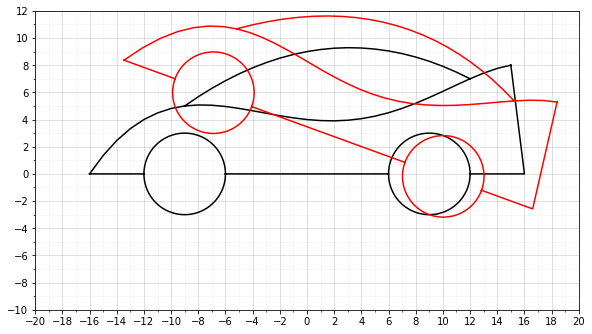

In [13]:
x_t, y_t = rotate(x, y, 20, (9,-3))
#fig, ax = draw_plot(x, y, 'k', plot_settings)
draw_plot(x_t, y_t, 'r', subplot=draw_plot(x, y, 'k', plot_settings))

def test_draw_plot(x,y,color,settings):
    fig, ax = new_plot(settings)
    return ax.plot(x, y, color)
    
print(test_draw_plot(x_t +2, y_t, 'k', plot_settings))

In [14]:
import matplotlib.animation

In [15]:
def move_car(i, *args):
    ax = args[0]
    x,y = args[1]
    lins = args[2]
    max_degree = args[3]
    x_r_offset,y_r_offset = args[4]
    rotate_speed = args[5]

    _i = i*(i/7)
    drop_speed = rotate_speed*1.5
    weeli_start_frame = 4
    drop_frame = weeli_start_frame + 5
    
    if max_degree != 0 and i >= weeli_start_frame:
        if max_degree > (i-weeli_start_frame)*rotate_speed:
            x_r,y_r = rotate(x,y,(i-weeli_start_frame)*rotate_speed, (x_r_offset, y_r_offset))
        else:
            if i <= drop_frame:
                x_r,y_r = rotate(x,y,max_degree, (x_r_offset, y_r_offset))
                x_r -= _i/2
            elif max_degree-(i-drop_frame)*drop_speed >= 0:
                x_r,y_r = rotate(x,y,max_degree-(i-drop_frame)*drop_speed, (x_r_offset, y_r_offset))
                x_r -= _i/2
            else:
                x_r = x - _i
                y_r = y
    else:
        x_r = x
        y_r = y

    lins.set_data(x_r-_i,y_r)
    #ax.set_title('i = '+str(i))

In [16]:
def animaton(grafic, plot_settings, frames, start_point=(0,0), max_degree = 0, rotation_offset=(0,0), rotate_speed=10):
    x,y = grafic
    x_r,y_r = rotation_offset
    x_start, y_start = start_point
    
    x_r += x_start
    y_r += y_start
    x_displace = x + x_start
    y_displace = y + y_start
    fig, ax = new_plot(plot_settings)

    lins, = ax.plot(x_displace,y_displace,'k')

    return matplotlib.animation.FuncAnimation(fig,move_car, frames=frames, fargs = (ax, (x_displace,y_displace), lins, max_degree, (x_r,y_r), rotate_speed))

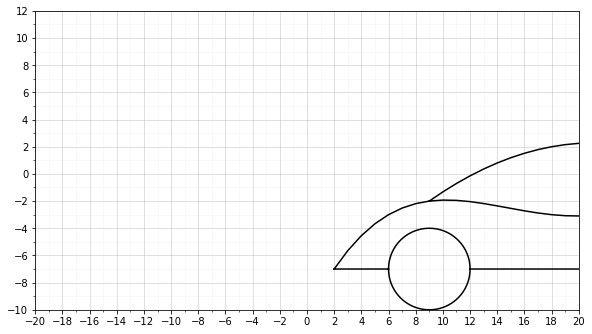

In [17]:
ani = animaton((x , y-7), plot_settings, np.arange(0,15), (18,0), 25, (9,-3), 7)
#draw_plot(x,y,'k', plot_settings)

In [18]:
from IPython.display import HTML
HTML(ani.to_jshtml())

In [19]:
ani.save('wheelie.gif', writer='imagemagick')